In [1]:
%run '../dynamo_helper_functions.ipynb'

/tmp/ipykernel_2797272/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


['/net/capricorn/home/xing/soh29/.conda/envs/dynamo_06_2024/lib/python3.8/site-packages/dynamo']


package,umap-learn,trimap,tqdm,statsmodels,setuptools,seaborn,scipy,scikit-learn,python-igraph,pynndescent,pre-commit,pandas,numpy,numdifftools,numba,networkx,matplotlib,loompy,hdbscan,dynamo-release,cvxopt,colorcet
version,0.5.6,1.1.4,4.66.4,0.14.1,70.1.0,0.13.2,1.10.1,1.3.2,0.11.5,0.5.8,3.5.0,1.2.0,1.23.0,0.9.41,0.51.2,3.1,3.7.5,3.0.7,0.8.37,1.0.0,1.3.2,3.1.0


In [2]:
data_names = [0,12.5,25,50,100,200,400,800]
#fig_path = "fig3_plots/"
colors = {'G1.S':'firebrick', 'S':'orange', 'G2':'yellowgreen', 'G2.M':'teal', 'M.G1':'royalblue'}
colors2 = {'G1-S':'firebrick', 'S':'orange', 'G2-M':'yellowgreen', 'M':'teal', 'M-G1':'royalblue'} #Dynamo

In [3]:
import copy

# Load data

In [17]:
adata = dyn.read_loom("../../data/static_MCF10A/processed_possorted_genome_bam_RIG79.loom")
temp = np.empty((len(adata.obs),1), dtype=object)
temp.shape
for i in range(len(adata.obs)):
    temp[i] = str(int(float(adata.obs['dosage'][i])))
adata.obs['dosage'] = temp

In [18]:
# MCF10A data with density
same_ref_with_density = reload_data("../../data/static_MCF10A/generated_data/With_density/Same_Ref_With_Density_vf_", 
                                    '../../data/static_MCF10A/generated_data/With_density/uns_dict_')

In [19]:
dose_data = []
for i in range(4):
    temp = pd.read_csv('../../data/static_MCF10A/generated_data/Revelio_output/DC_dose_'+str(doses[i])+'.csv', index_col=0)
    dose_data.append(temp)

In [20]:
with open('../../data/static_MCF10A/generated_data/dose12_traj_simulation/100_trajs.pkl', 'rb') as f:
    trajs = pickle.load(f)

In [21]:
path1_indexes = np.load("../../data/static_MCF10A/generated_data/dose12_traj_simulation/path1_indexes.npy")
path2_indexes = np.load("../../data/static_MCF10A/generated_data/dose12_traj_simulation/path2_indexes.npy")

In [22]:
print(len(path1_indexes))
print(len(path2_indexes))

90
10


In [23]:
# Load the two representative trajectories
path0 = np.load("../../data/static_MCF10A/generated_data/dose12_traj_simulation/path1.npy")
path1 = np.load("../../data/static_MCF10A/generated_data/dose12_traj_simulation/path2.npy")

In [24]:
with open('../../data/static_MCF10A/generated_data/dose12_traj_simulation/500_trajs.pkl', 'rb') as f:
    trajs_500 = pickle.load(f)

In [25]:
path_labels_500 = np.load("../../data/static_MCF10A/generated_data/dose12_traj_simulation/500_trajs_path_labels.npy")

In [26]:
print(np.where(path_labels_500==0)[0].shape[0])
print(np.where(path_labels_500==1)[0].shape[0])

459
41


# Processing dose 12.5 pM tgfb treated cells

In [56]:
additional_boundary_range = 0
i=1
dose = str(doses[i])
dose_adata = adata[(dose == adata.obs['dosage'])]

In [57]:
# Finding intersecting indexes between revelio and dataset
dose_index = dose_adata.obs.index
cc_index = dose_data[i].index
cells_intersect = np.intersect1d(dose_index, cc_index)

In [58]:
new_adata = dose_adata[cells_intersect,:]
dose_data[i] = dose_data[i].reindex(new_adata.obs.index)

cols = dose_data[i].columns[2:9].tolist()
cols.insert(0, 'RC nneighbor')

coords = np.array(dose_data[i][cols])

dose12 = dose_adata[dose_data[1].index,:]

In [59]:
# Process the original data 
dyn.pp.recipe_monocle(dose12, n_top_genes=2000, keep_filtered_genes=True)
dyn.tl.dynamics(dose12, model='deterministic', cores=3)
dyn.tl.reduceDimension(dose12)

|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type to uns['pp'] in AnnData Object.
|-----> filtering cells...
|-----> filtering genes...


{'filter_bool': None, 'layer': 'all', 'min_cell_s': 12.280000000000001, 'min_cell_u': 6.140000000000001, 'min_cell_p': 6.140000000000001, 'min_avg_exp_s': 0, 'min_avg_exp_u': 0, 'min_avg_exp_p': 0, 'max_avg_exp': inf, 'min_count_s': 0, 'min_count_u': 0, 'min_count_p': 0, 'shared_count': 30}


|-----> calculating size factor...
|-----> selecting genes...


                             Accession  Chromosome       End     Start Strand  \
BX004987.1           ENSG00000278704.1  GL000009.2     58376     56140      -   
AC145212.1           ENSG00000277400.1  GL000194.1    115018     53590      -   
MAFIP                ENSG00000274847.1  GL000194.1    115055     53594      -   
Y_RNA                ENSG00000277428.1  GL000195.1     37534     37434      -   
AC011043.1           ENSG00000276256.1  GL000195.1     49164     42939      -   
...                                ...         ...       ...       ...    ...   
DPH3P2-1       ENSG00000237040.6_PAR_Y           Y  57062405  57062156      +   
VAMP7-1       ENSG00000124333.16_PAR_Y           Y  57130289  57067865      +   
IL9R-1        ENSG00000124334.17_PAR_Y           Y  57197337  57184101      +   
AJ271736.1-1   ENSG00000270726.6_PAR_Y           Y  57208756  57190738      +   
WASH6P-1      ENSG00000182484.15_PAR_Y           Y  57212230  57207346      +   

              nCells  nCoun

|-----> <insert> frac to var in AnnData Object.


sort by:  SVR
adata shape:  (1228, 60668)
adata shape:  (1228, 2000)
layer:  X
CM:  (1228, 2000)
CM:  (1228, 2000)
detected_bool:  [ True  True  True ...  True  True  True]
valid CM:  (1228, 2000)
mu:  [0.29736155 0.4621809  0.15675618 ... 0.22327769 0.34397694 1.359357  ]
mu shape:  (2000,)
log_m:  [-1.74971    -1.1134704  -2.673406   ... -2.163089   -1.5396162
  0.44292438]


|-----> size factor normalizing the data, followed by log1p transformation.
|-----> applying PCA ...
|-----> <insert> pca_fit to uns in AnnData Object.
|-----> <insert> ntr to obs in AnnData Object.
|-----> <insert> ntr to var in AnnData Object.
|-----> cell cycle scoring...
|-----> computing cell phase...
|
|-----> [cell phase estimation] finished [85.6511s]
|-----> <insert> cell_cycle_phase to obs in AnnData Object.
|-----> <insert> cell_cycle_scores to obsm in AnnData Object.
|
|-----> [Cell Cycle Scores Estimation] finished [0.2392s]
|
|-----> [recipe_monocle preprocess] finished [3.4455s]
|-----> calculating first/second moments begins...


X shape:  (1228, 30)
neighbors:  30
random_state:  RandomState(MT19937)
min_dist:  0.1
n_components:  2


|
|-----> [moments calculation] finished [6.6867s]
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...


X shape:  (1228, 30)
neighbors:  30
random_state:  RandomState(MT19937)
min_dist:  0.5
n_components:  2


|
|-----> [dimension_reduction projection] finished [5.3928s]


In [60]:
dose12.obsm['X_DC'] = np.array(dose_data[1][['DC1','DC2','DC3','DC4','DC5','DC6','DC7','DC8','DC9','DC10']])

In [61]:
dyn.tl.cell_wise_confidence(dose12)
dose12.obsm['X_RC'] = np.array(dose_data[1][cols].reindex(dose12.obs.index))

X shape:  (1228, 30)
neighbors:  30
random_state:  RandomState(MT19937)
min_dist:  0.1
n_components:  2


In [62]:
same_ref_with_density[1].obs.index = same_ref_with_density[1].obs['obs_names']

In [66]:
dose12.obsm['X_umap_orig'] = np.array(same_ref_with_density[1][dose12.obs.index,:].obsm['X_umap'])

In [68]:
dyn.tl.cell_velocities(dose12, basis = 'umap_orig', enforce = True, method='pearson', other_kernels_dict={'transform': 'sqrt'}, correct_density = True)
dyn.vf.VectorField(dose12, basis='umap_orig', M=1000)

|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [1.8971s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.5618s]
|-----> vectorfield calculation begins...
|-----> Retrieve X and V based on basis: UMAP_ORIG. 
        Vector field will be learned in the UMAP_ORIG space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.


V_emb:  (1228, 2)
neighs:  [[ 194  316  707 ...  693  779 1027]
 [ 316  194  707 ...  693   20  779]
 [ 316  194  301 ...  505   20 1028]
 ...
 [ 879  913 1183 ... 1226  227   87]
 [ 879    3  968 ... 1029 1040   87]
 [   3  968  613 ...  556   87 1040]]
X_grid:  (2500, 2)
V_grid:  (2500, 2)
mass:  [[9.18554787e-115 1.44195463e-101 2.21878207e-088 ... 1.93951270e-108
  1.87585551e-130 4.48104235e-155]
 [1.27881914e-102 9.13999742e-090 1.18427799e-077 ... 1.76398948e-101
  1.70609318e-123 7.74056445e-146]
 [1.61373362e-091 1.10111238e-078 7.42383231e-068 ... 1.45280390e-095
  1.40512221e-117 2.73495533e-129]
 ...
 [2.40931383e-151 8.75130410e-141 7.85100201e-133 ... 2.77268448e-067
  1.26672186e-077 6.01594470e-083]
 [0.00000000e+000 1.92401764e-157 1.72608176e-149 ... 1.89861813e-077
  9.50399863e-090 4.97526613e-096]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 1.17728732e-088
  5.19012262e-101 3.92392383e-110]]
min_mass:  1e-05
cutoff:  (50, 50)
V_grid: (2, 50, 50)
cutoff:  

|-----> <insert> velocity_umap_orig_SparseVFC to obsm in AnnData Object.
|-----> <insert> X_umap_orig_SparseVFC to obsm in AnnData Object.
|-----> <insert> VecFld_umap_orig to uns in AnnData Object.
|-----> <insert> control_point_umap_orig to obs in AnnData Object.
|-----> <insert> inlier_prob_umap_orig to obs in AnnData Object.
|-----> <insert> obs_vf_angle_umap_orig to obs in AnnData Object.
|
|-----> [VectorField] finished [8.8008s]


In [69]:
dyn.tl.cell_velocities(dose12, basis = 'RC', enforce = True, method='pearson', other_kernels_dict={'transform': 'sqrt'}, correct_density = True)
dyn.vf.VectorField(dose12, basis='RC', M=1000)
dyn.vf.topography(dose12, basis='RC')

|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] finished [1.8819s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [0.5695s]
|-----> vectorfield calculation begins...
|-----> Retrieve X and V based on basis: RC. 
        Vector field will be learned in the RC space.
|-----> Learning vector field with method: sparsevfc.


V_emb:  (1228, 2)
neighs:  [[107 643 278 ... 519 921 567]
 [107 643 278 ... 567 300 686]
 [117 270  85 ... 315 487 161]
 ...
 [584 351 642 ... 472 169 130]
 [584 351 696 ... 751 745 889]
 [584 351 696 ... 745 119 184]]
X_grid:  (2500, 2)
V_grid:  (2500, 2)
mass:  [[6.64899873e-012 5.53052091e-012 3.22214873e-010 ... 3.95874944e-007
  1.93930486e-004 2.17986772e-004]
 [3.40836242e-009 2.84110528e-009 4.70654139e-008 ... 4.44097026e-005
  1.08063677e-002 1.17020931e-002]
 [7.55972517e-007 6.33017441e-007 2.93932379e-006 ... 2.94463926e-003
  2.71432752e-001 2.67984343e-001]
 ...
 [3.53604100e+000 2.93581098e+000 3.70177046e-001 ... 1.59621707e-106
  5.22664489e-106 1.32723046e-109]
 [3.59431624e+000 2.98419078e+000 6.22283947e-002 ... 1.33236998e-115
  4.36270533e-115 1.10784558e-118]
 [1.55701476e+000 1.29271547e+000 4.51439277e-003 ... 4.73948390e-125
  1.55189414e-124 3.94080950e-128]]
min_mass:  1e-05
cutoff:  (50, 50)
V_grid: (2, 50, 50)
cutoff:  [[ True  True  True ...  True False 

|-----> <insert> velocity_RC_SparseVFC to obsm in AnnData Object.
|-----> <insert> X_RC_SparseVFC to obsm in AnnData Object.
|-----> <insert> VecFld_RC to uns in AnnData Object.
|-----> <insert> control_point_RC to obs in AnnData Object.
|-----> <insert> inlier_prob_RC to obs in AnnData Object.
|-----> <insert> obs_vf_angle_RC to obs in AnnData Object.
|
|-----> [VectorField] finished [8.7890s]


AnnData object with n_obs × n_vars = 1228 × 60668
    obs: 'dosage', 'nGenes', 'nCounts', 'pMito', 'use_for_pca', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence', 'control_point_umap_orig', 'inlier_prob_umap_orig', 'obs_vf_angle_umap_orig', 'control_point_RC', 'inlier_prob_RC', 'obs_vf_angle_RC'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'use_for_pca', 'frac', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'umap_fit', 'gr

In [70]:
i=1
additional_boundary_range = 0
CC = dose_data[i]['CC']
CC.index = dose12.obs.index
dose12.obs['CC'] = CC

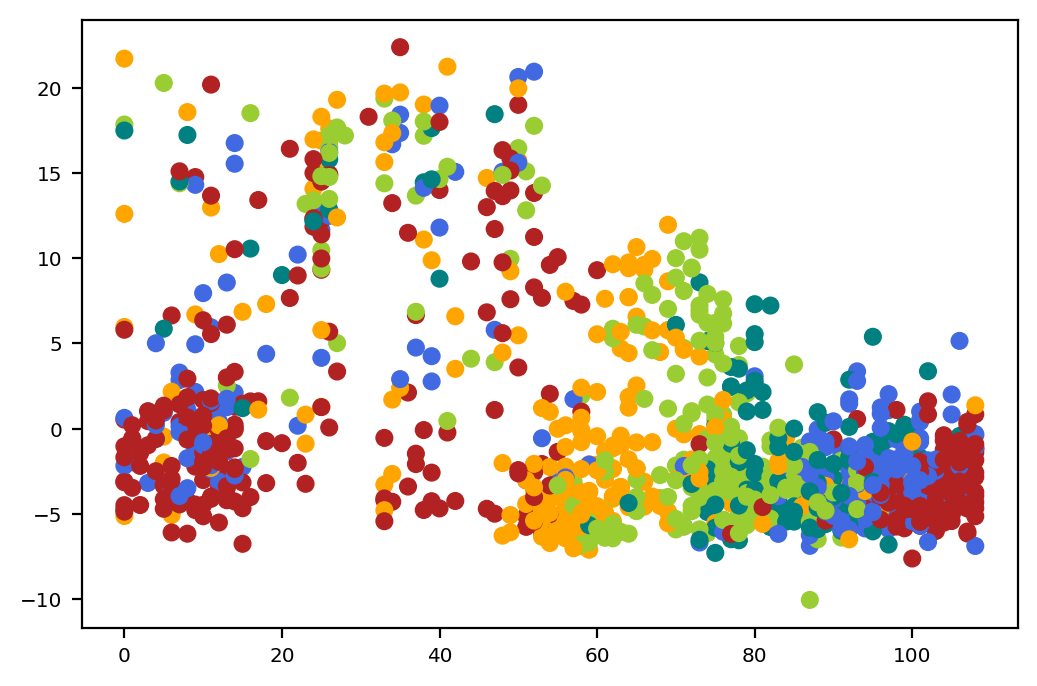

In [71]:
plt.scatter(dose12.obsm['X_RC'][:,0],
            dose12.obsm['X_RC'][:,1],
            c=dose12.obs['CC'].map(colors))

# Trajectory simulation setup

In [30]:
start_pos = list(np.where(dose12.obsm['X_RC'][:,1] < -2.5)[0])
targets = list(np.where(dose12.obsm['X_RC'][:,1] > 13)[0])

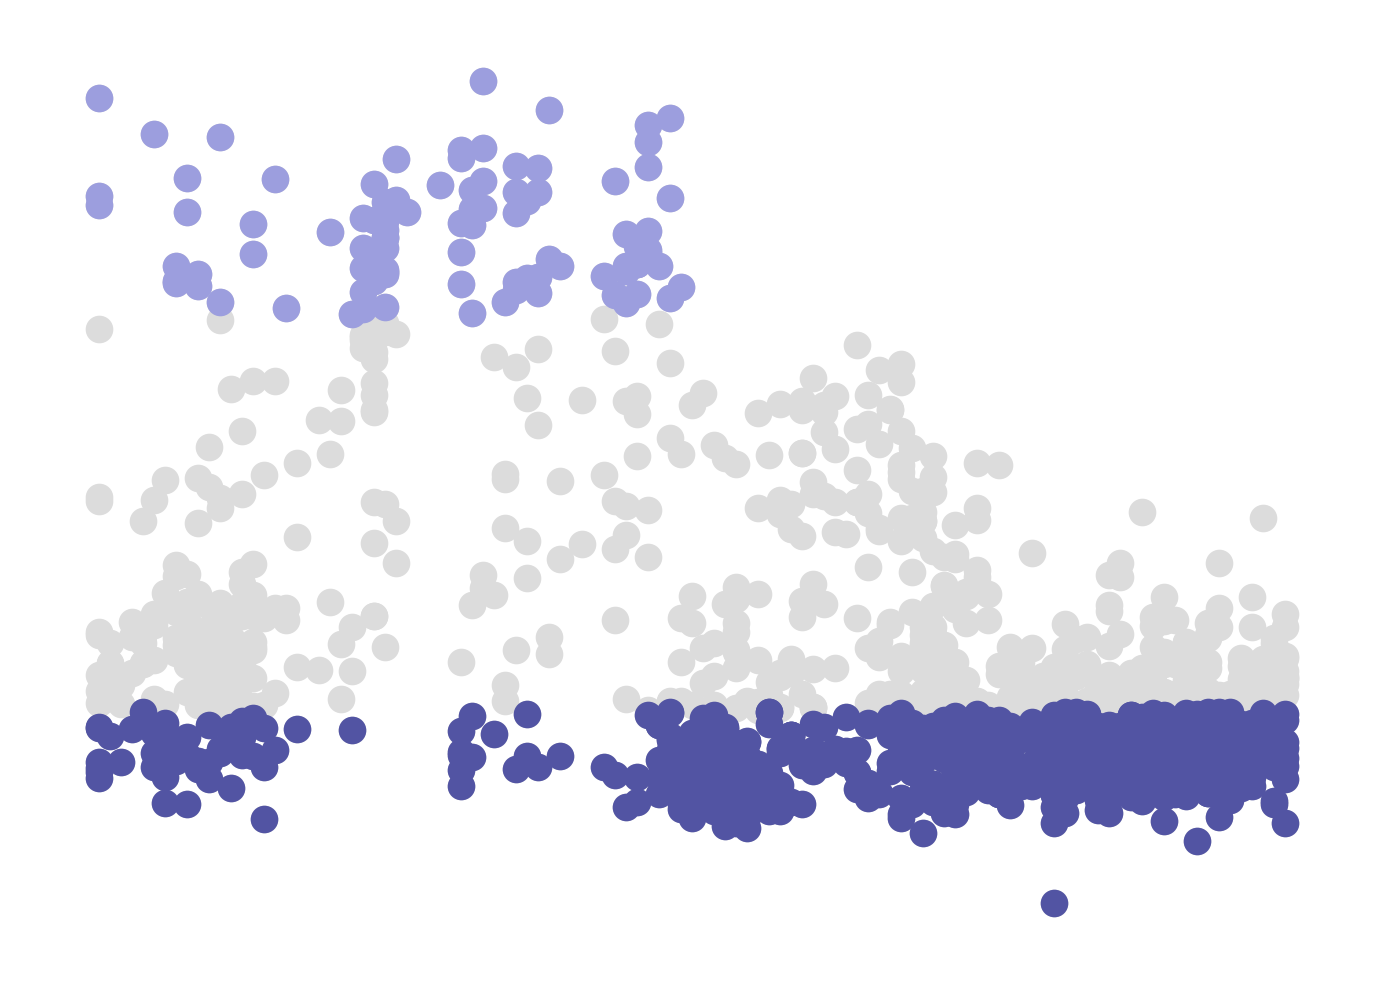

In [36]:
cmap = plt.cm.get_cmap("tab20b")
plt.figure(figsize=(3.5,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
plt.scatter(dose12.obsm['X_RC'][:,0],
            dose12.obsm['X_RC'][:,1],
            s=20,
            color='gainsboro')

plt.scatter(dose12.obsm['X_RC'][start_pos,0],
            dose12.obsm['X_RC'][start_pos,1],
            color=cmap(1),
            #color=(68,43,132),
            label='potential start points',
            s=20)
plt.scatter(dose12.obsm['X_RC'][targets,0],
            dose12.obsm['X_RC'][targets,1],
            color=cmap(3),
            label='potential end points',
            s=20)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(fig_path + "panelA_trajectory_simulation.svg", transparent=True, dpi=300)

# Trajectory simulation results

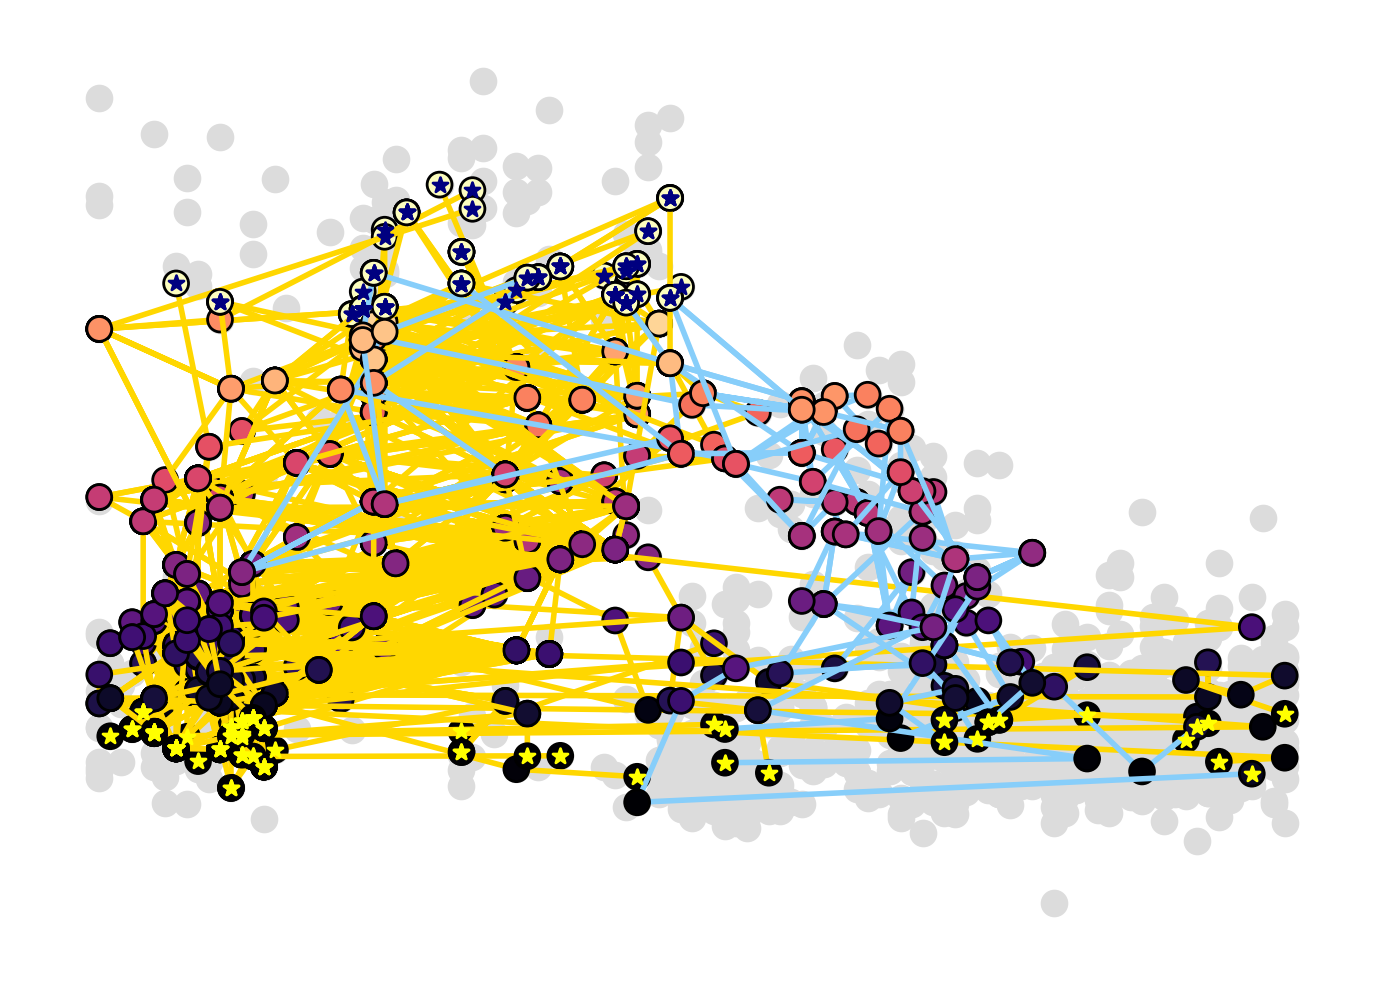

In [62]:
cmap = plt.cm.get_cmap("magma")
plt.figure(figsize=(3.5,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
plt.scatter(dose12.obsm['X_RC'][:,0],
            dose12.obsm['X_RC'][:,1],
            s=20,
            color='gainsboro')
for i in path1_indexes:
    plt.plot(dose12.obsm['X_RC'][trajs[i],0],
            dose12.obsm['X_RC'][trajs[i],1],
            color='gold',
            linewidth=1)
    plt.scatter(dose12.obsm['X_RC'][trajs[i],0],
                dose12.obsm['X_RC'][trajs[i],1],
                s=20,
                edgecolors='black',
                c=dose12.obsm['X_RC'][trajs[i],1],
                cmap='magma',
                zorder=2)
    plt.scatter(dose12.obsm['X_RC'][trajs[i][0],0],
                dose12.obsm['X_RC'][trajs[i][0],1],
                marker='*',
                s=8,
                color='yellow',
                zorder=3)
    plt.scatter(dose12.obsm['X_RC'][trajs[i][-1],0],
            dose12.obsm['X_RC'][trajs[i][-1],1],
            marker='*',
            s=8,
            color='navy',
            zorder=3)
    
for i in path2_indexes:
    plt.plot(dose12.obsm['X_RC'][trajs[i],0],
            dose12.obsm['X_RC'][trajs[i],1],
            color='lightskyblue',
            linewidth=1)
    plt.scatter(dose12.obsm['X_RC'][trajs[i],0],
                dose12.obsm['X_RC'][trajs[i],1],
                s=20,
                edgecolors='black',
                c=dose12.obsm['X_RC'][trajs[i],1],
                cmap='magma',
                zorder=2)
    plt.scatter(dose12.obsm['X_RC'][trajs[i][0],0],
                dose12.obsm['X_RC'][trajs[i][0],1],
                marker='*',
                s=8,
                color='yellow',
                zorder=3)
    plt.scatter(dose12.obsm['X_RC'][trajs[i][-1],0],
                dose12.obsm['X_RC'][trajs[i][-1],1],
                marker='*',
                s=8,
                color='navy',
                zorder=3)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(fig_path + "panelB_all_trajs_two_paths.png", transparent=True, dpi=300)

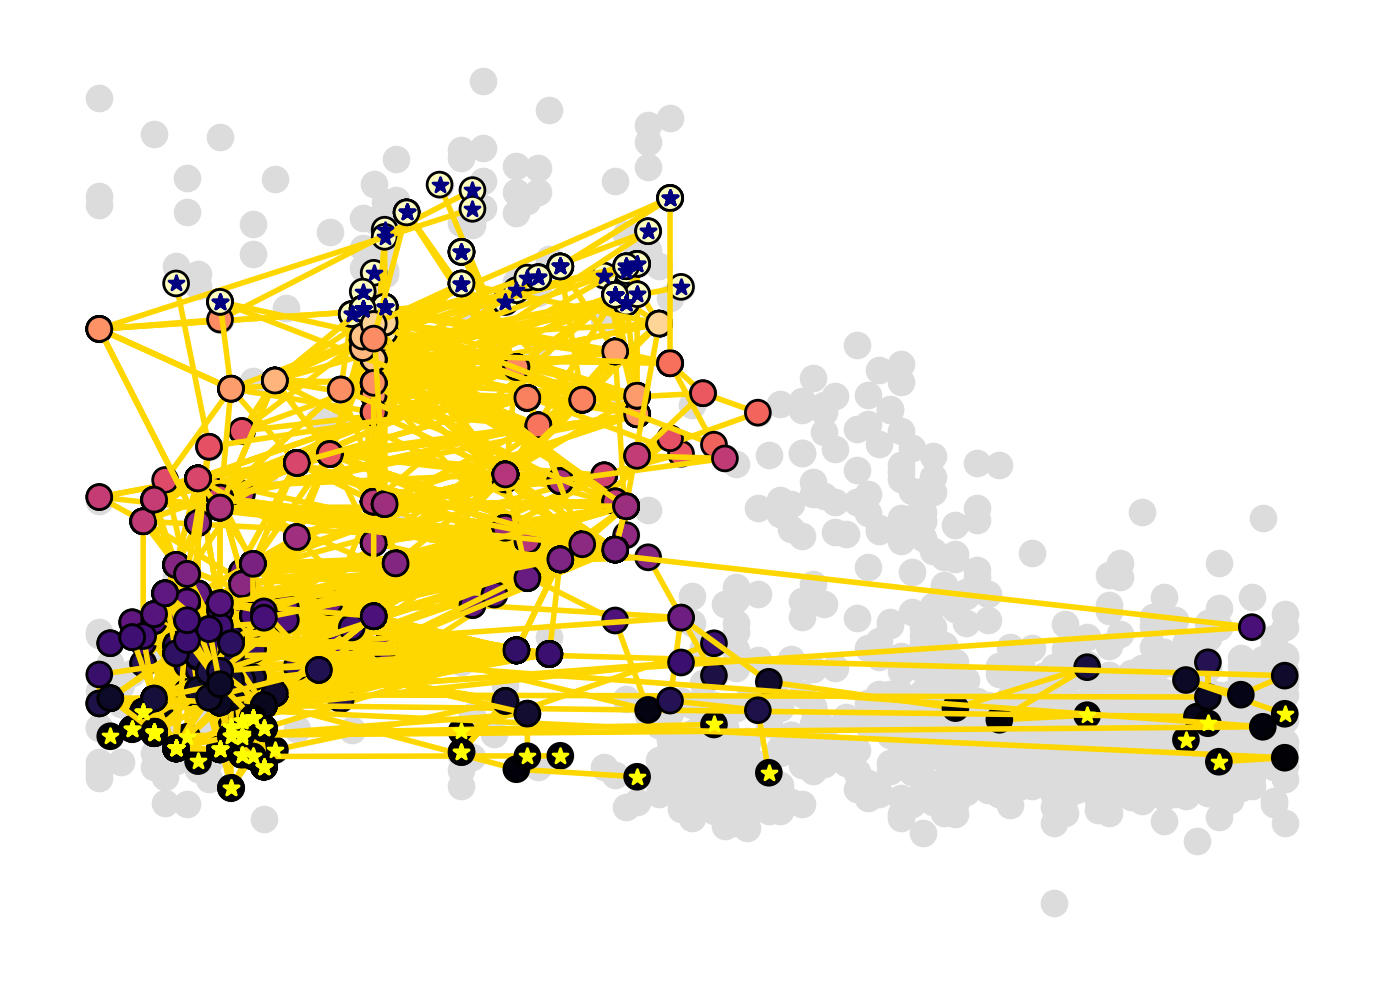

In [63]:
cmap = plt.cm.get_cmap("magma")
plt.figure(figsize=(3.5,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
plt.scatter(dose12.obsm['X_RC'][:,0],
            dose12.obsm['X_RC'][:,1],
            s=20,
            color='gainsboro')
for i in path1_indexes:
    plt.plot(dose12.obsm['X_RC'][trajs[i],0],
            dose12.obsm['X_RC'][trajs[i],1],
            color='gold',
            linewidth=1)
    plt.scatter(dose12.obsm['X_RC'][trajs[i],0],
                dose12.obsm['X_RC'][trajs[i],1],
                s=20,
                edgecolors='black',
                c=dose12.obsm['X_RC'][trajs[i],1],
                cmap='magma',
                zorder=2)
    plt.scatter(dose12.obsm['X_RC'][trajs[i][0],0],
                dose12.obsm['X_RC'][trajs[i][0],1],
                marker='*',
                s=8,
                color='yellow',
                zorder=3)
    plt.scatter(dose12.obsm['X_RC'][trajs[i][-1],0],
            dose12.obsm['X_RC'][trajs[i][-1],1],
            marker='*',
            s=8,
            color='navy',
            zorder=3)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(fig_path + "panelB_path1_trajs.png", transparent=True, dpi=300)

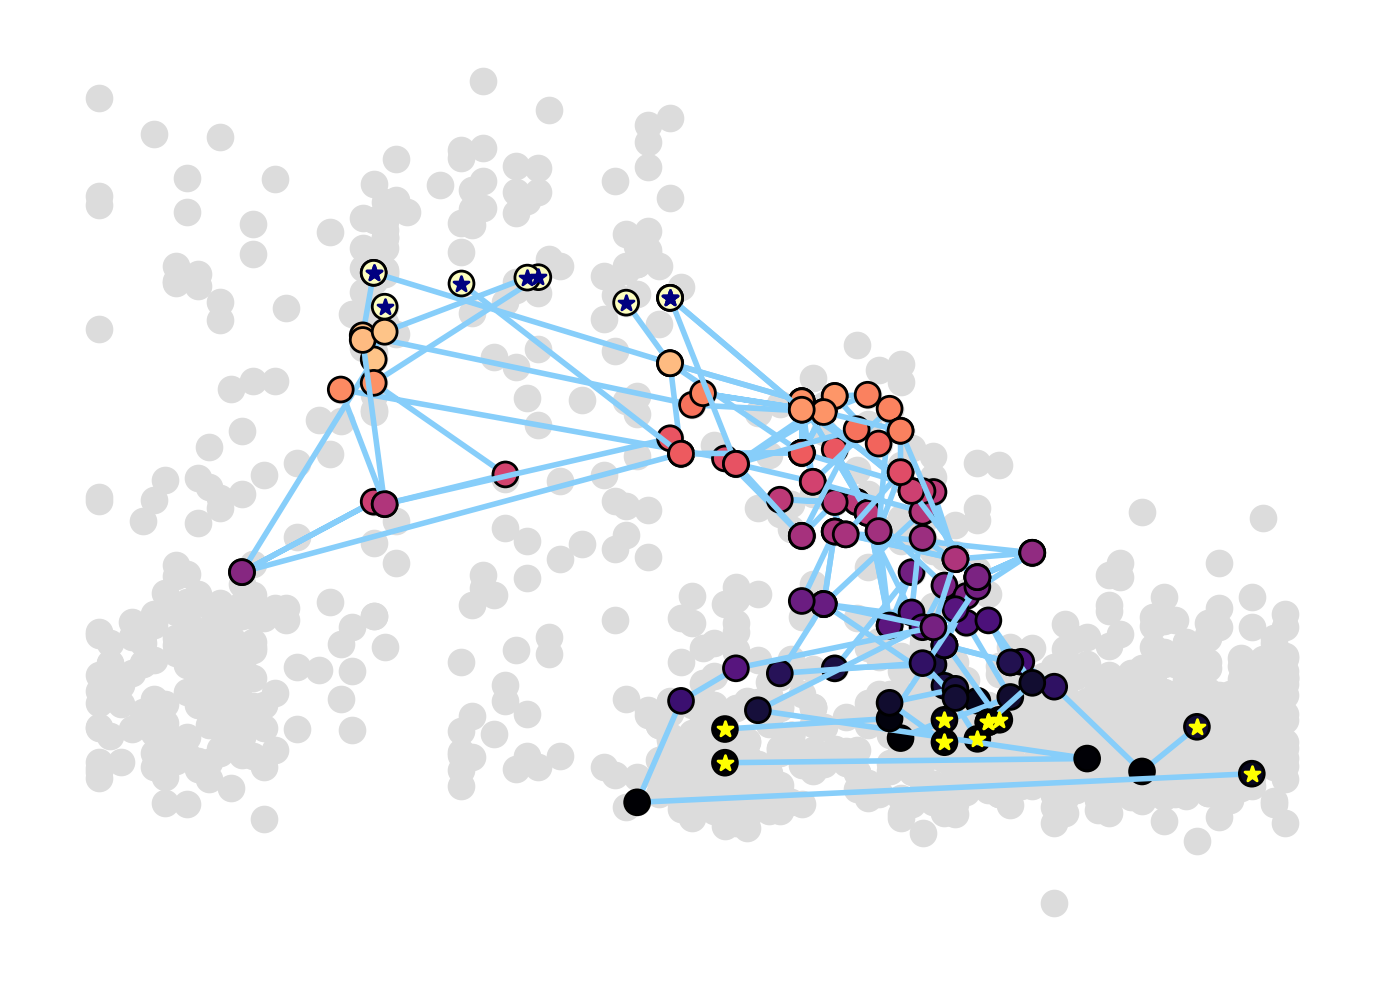

In [64]:
cmap = plt.cm.get_cmap("magma")
plt.figure(figsize=(3.5,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
plt.scatter(dose12.obsm['X_RC'][:,0],
            dose12.obsm['X_RC'][:,1],
            s=20,
            color='gainsboro')
for i in path2_indexes:
    plt.plot(dose12.obsm['X_RC'][trajs[i],0],
            dose12.obsm['X_RC'][trajs[i],1],
            color='lightskyblue',
            linewidth=1)
    plt.scatter(dose12.obsm['X_RC'][trajs[i],0],
                dose12.obsm['X_RC'][trajs[i],1],
                s=20,
                edgecolors='black',
                c=dose12.obsm['X_RC'][trajs[i],1],
                cmap='magma',
                zorder=2)
    plt.scatter(dose12.obsm['X_RC'][trajs[i][0],0],
                dose12.obsm['X_RC'][trajs[i][0],1],
                marker='*',
                s=8,
                color='yellow',
                zorder=3)
    plt.scatter(dose12.obsm['X_RC'][trajs[i][-1],0],
                dose12.obsm['X_RC'][trajs[i][-1],1],
                marker='*',
                s=8,
                color='navy',
                zorder=3)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(fig_path + "panelB_path2_trajs.png", transparent=True, dpi=300)

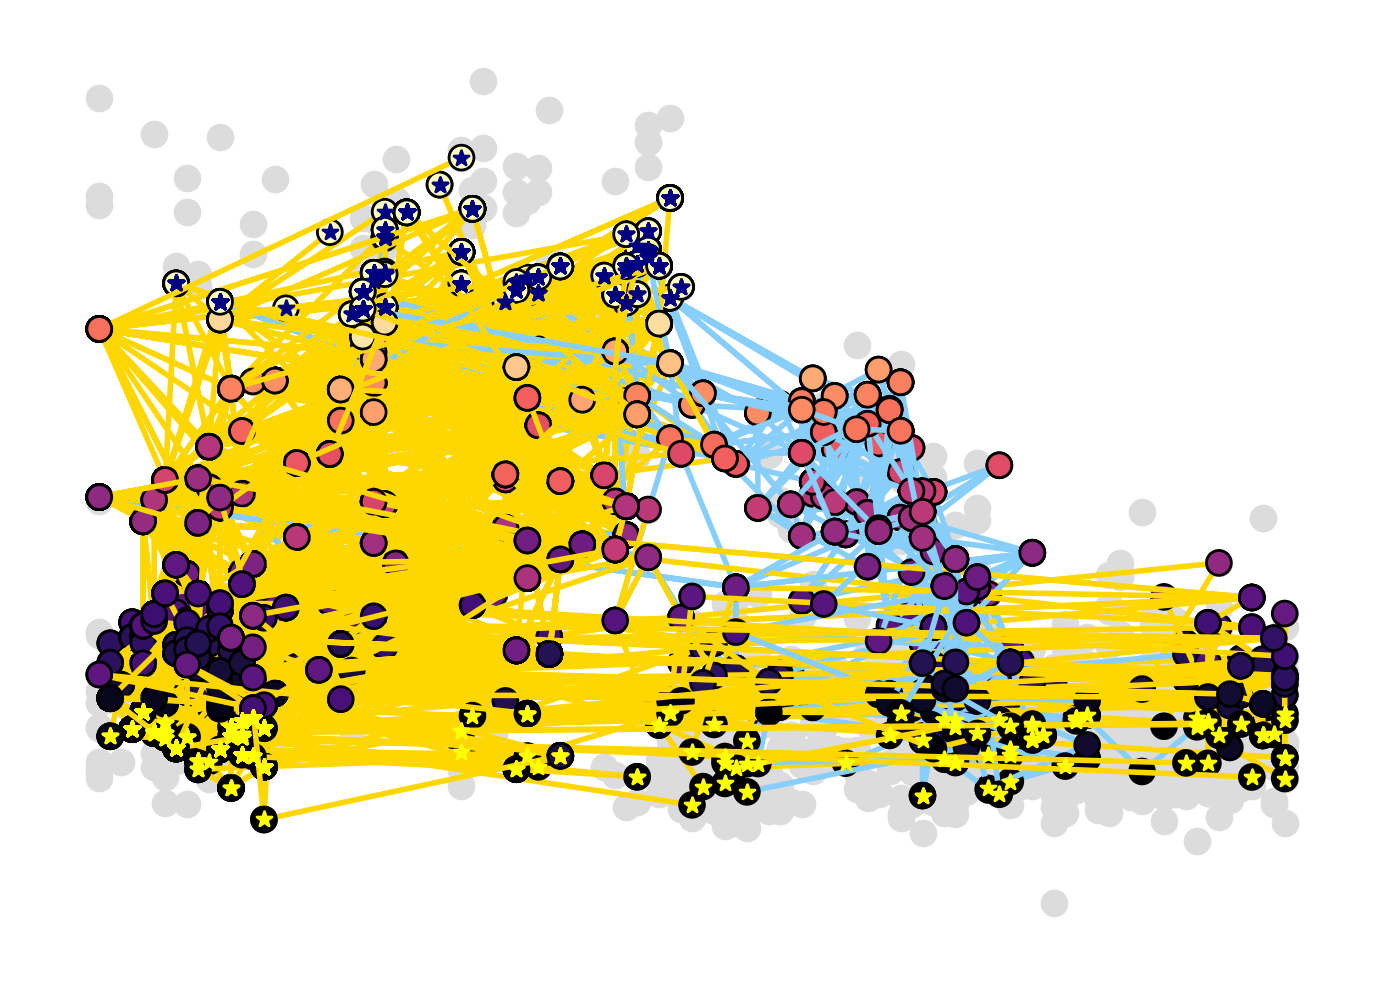

In [74]:
cmap = plt.cm.get_cmap("magma")
plt.figure(figsize=(3.5,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
plt.scatter(dose12.obsm['X_RC'][:,0],
            dose12.obsm['X_RC'][:,1],
            s=20,
            color='gainsboro')
for i in range(len(trajs_500)):
    if path_labels_500[i] == 0:
        plt.plot(dose12.obsm['X_RC'][trajs_500[i],0],
                dose12.obsm['X_RC'][trajs_500[i],1],
                color='gold',
                linewidth=1)
    else:
        plt.plot(dose12.obsm['X_RC'][trajs_500[i],0],
                dose12.obsm['X_RC'][trajs_500[i],1],
                color='lightskyblue',
                linewidth=1)
    plt.scatter(dose12.obsm['X_RC'][trajs_500[i],0],
                dose12.obsm['X_RC'][trajs_500[i],1],
                s=20,
                edgecolors='black',
                c=dose12.obsm['X_RC'][trajs_500[i],1],
                cmap='magma',
                zorder=2)
    plt.scatter(dose12.obsm['X_RC'][trajs_500[i][0],0],
                dose12.obsm['X_RC'][trajs_500[i][0],1],
                marker='*',
                s=8,
                color='yellow',
                zorder=3)
    
    plt.scatter(dose12.obsm['X_RC'][trajs_500[i][-1],0],
            dose12.obsm['X_RC'][trajs_500[i][-1],1],
            marker='*',
            s=8,
            color='navy',
            zorder=3)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
#plt.savefig(fig_path + "panelB_all_trajs_two_paths.png", transparent=True, dpi=300)

# Two paths

([], [])

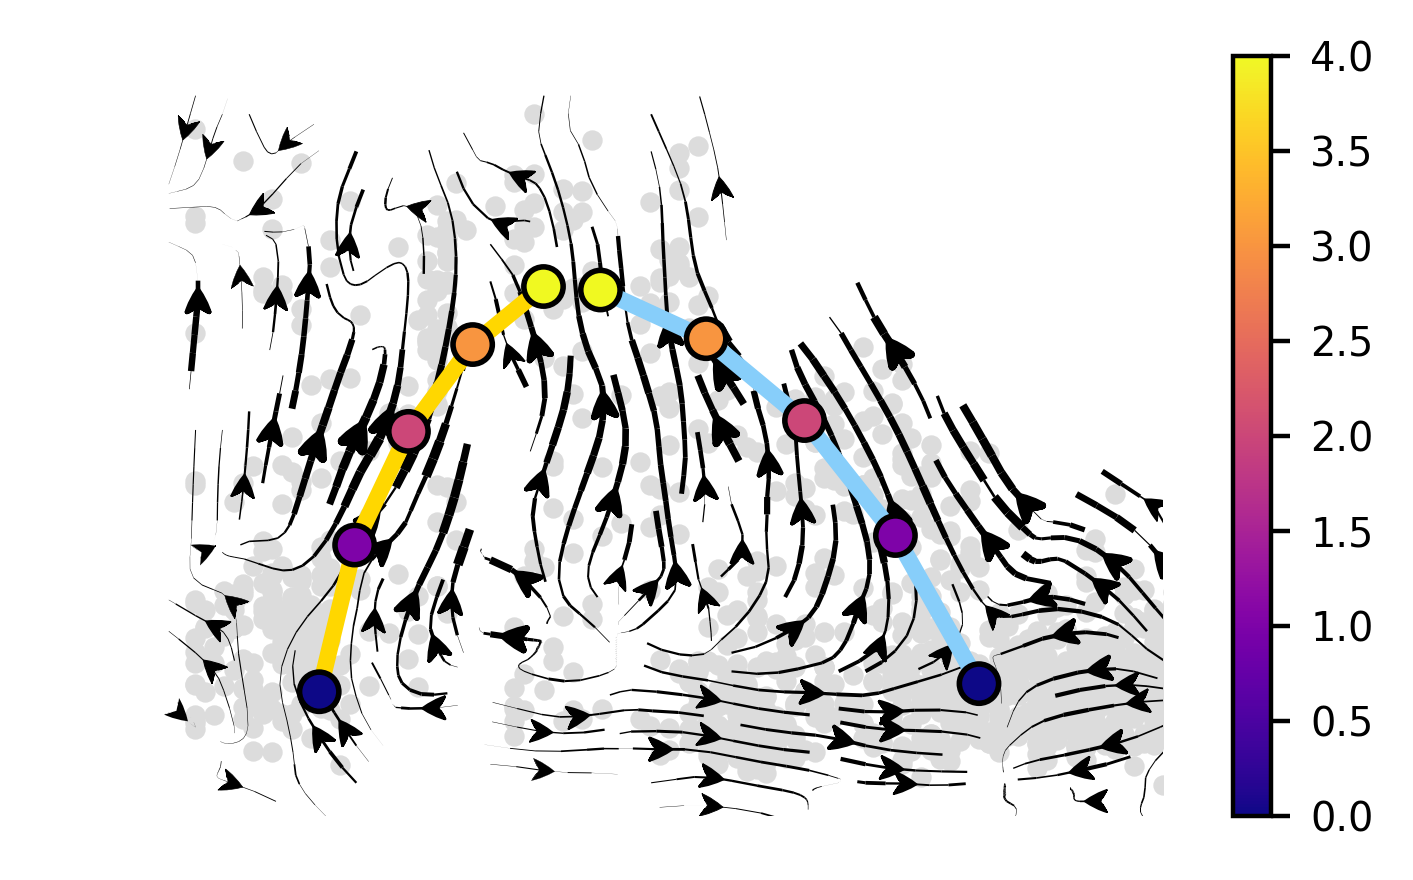

In [72]:
# On the new cell-cycle representation
dot_color2=np.arange(path1.shape[0])
cm=plt.cm.get_cmap('plasma')
plt.figure(figsize=(4.5,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)
plt.scatter(dose12.obsm['X_RC'][:,0], 
            dose12.obsm['X_RC'][:,1],
            s=10,
            color='gainsboro', zorder=1)
dyn.pl.zstreamline(dose12, basis='RC', zorder=2, density=0.7)
plt.plot(path1[:,0],path1[:,1],color='lightskyblue', linewidth=3, zorder=3)    
plt.scatter(path1[:,0],path1[:,1], s=50, edgecolor='black', linewidth=1,  c=dot_color2, cmap=cm, zorder=4)
plt.colorbar()
plt.plot(path0[:,0],path0[:,1],color='gold', linewidth=3, zorder=3)    
plt.scatter(path0[:,0],path0[:,1], s=50, edgecolor='black', linewidth=1, c=dot_color2,cmap=cm, zorder=4)

plt.axis([-16,100,-9,25])
plt.xticks([])
plt.yticks([])
#plt.savefig('dose12_two_paths_cell_cycle_coordinate.png',dpi=300, transparent=True)

In [73]:
# transfer back to the UMAP representation
umap_indexes_path0 = []
for i in range(path0.shape[0]):
    index = getNNeighbors(path0[i,:], dose12.obsm['X_RC'][:,:2], k=1).flatten()[0]
    umap_indexes_path0.append(index)
    
umap_indexes_path1 = []
for i in range(path1.shape[0]):
    index = getNNeighbors(path1[i,:], dose12.obsm['X_RC'][:,:2], k=1).flatten()[0]
    umap_indexes_path1.append(index)

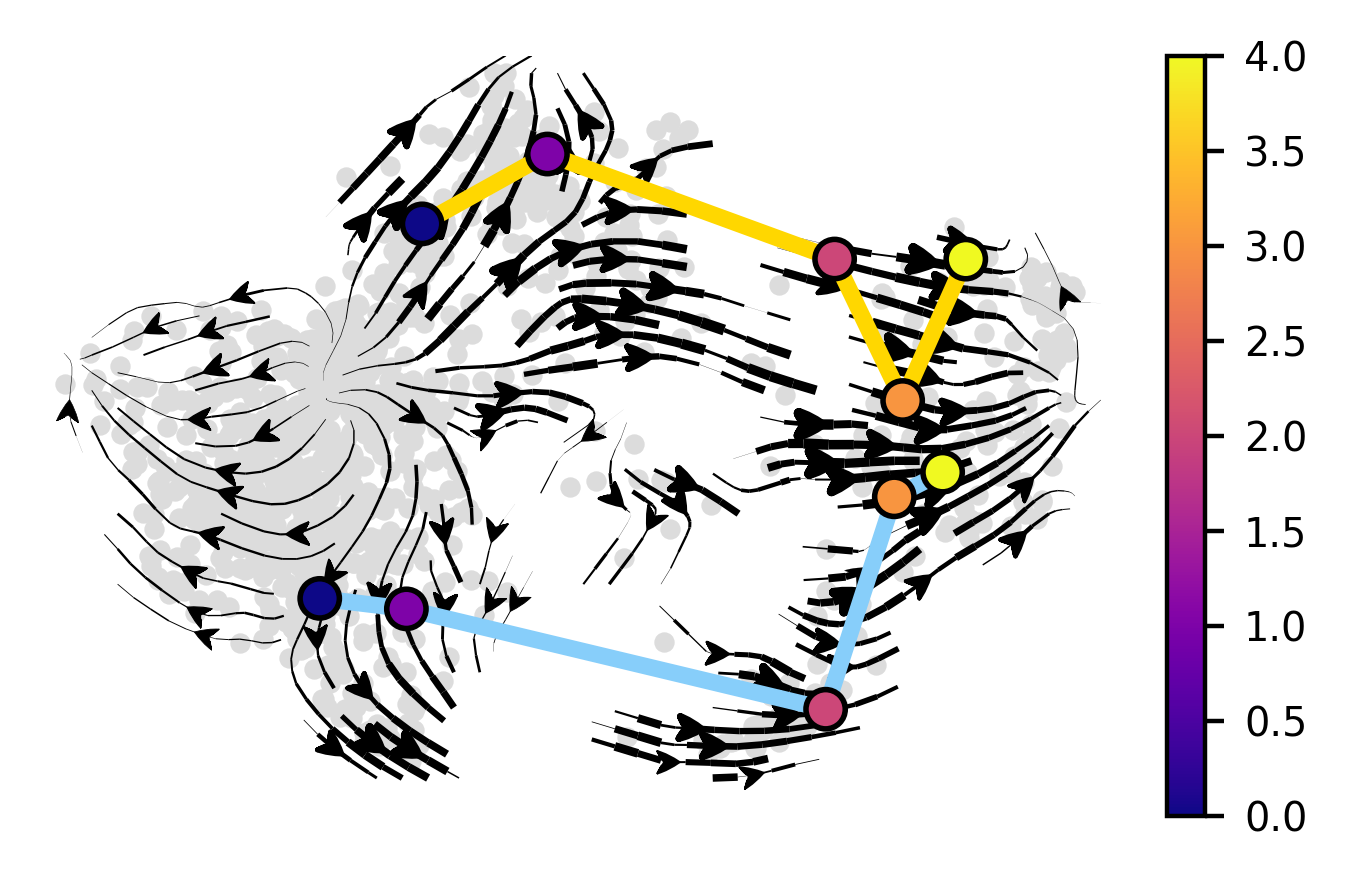

In [75]:
# two paths on the original UMAP representation
dot_color2=np.arange(path1.shape[0])
cm=plt.cm.get_cmap('plasma')
plt.figure(figsize=(4.25,2.5), dpi=200)
plt.subplot(1,1,1,frame_on=False)

plt.scatter(dose12.obsm['X_umap_orig'][:,0], 
            dose12.obsm['X_umap_orig'][:,1],
            s=10,
            color='gainsboro',
            zorder=1)

plt.plot(dose12.obsm['X_umap_orig'][umap_indexes_path0,0],
         dose12.obsm['X_umap_orig'][umap_indexes_path0,1],
         linewidth=3, 
         color='gold', 
         zorder=2)    
plt.scatter(dose12.obsm['X_umap_orig'][umap_indexes_path0,0],
            dose12.obsm['X_umap_orig'][umap_indexes_path0,1],
            s=50, 
            c=dot_color2,
            edgecolor='black', linewidth=1,
            cmap=cm, 
            zorder=3)

plt.plot(dose12.obsm['X_umap_orig'][umap_indexes_path1,0],
         dose12.obsm['X_umap_orig'][umap_indexes_path1,1],
         linewidth=3, 
         color='lightskyblue', 
         zorder=2)    
plt.scatter(dose12.obsm['X_umap_orig'][umap_indexes_path1,0],
            dose12.obsm['X_umap_orig'][umap_indexes_path1,1],
            s=50, 
            c=dot_color2,
            edgecolor='black', linewidth=1,
            cmap=cm, 
            zorder=3)
plt.colorbar()
dyn.pl.zstreamline(dose12, basis='umap_orig', zorder=1, density=0.7)
plt.xticks(fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
plt.xticks([])
plt.yticks([])
plt.savefig('dose12_two_paths_umap.png',dpi=300, transparent=True)